In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

In [8]:
df = pd.read_excel('DATA_1_e.xls')
df

,sequence,smiles,Num_monomers,Num_atoms,Num_heavy_atoms,Total_confs,Unique_confs,G_Energy,Temperature
0,N.A.P.A,C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@H](C)NC(=O)[...,4,48,25,241,45,-78.96015,298.15
1,P.F.C.S,O=C1N[C@@H](CO)C(=O)N2CCC[C@H]2C(=O)N[C@@H](Cc...,4,56,30,643,457,-91.49403,298.15
2,f.I.N.G,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)...,4,60,31,1327,409,-94.85184,298.15
3,I.V.T.V,CC[C@H](C)[C@@H]1NC(=O)[C@H](C(C)C)NC(=O)[C@H]...,4,65,29,1386,91,-93.37815,298.15
4,Q.A.C.N,C[C@@H]1NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CC(N)...,4,52,28,485,281,-89.71180,298.15
...,...,...,...,...,...,...,...,...,...
98,MeC.y.f.MeG,CN1CC(=O)N(C)[C@@H](CS)C(=O)N[C@H](Cc2ccc(O)cc...,4,65,35,2548,667,-104.23719,298.15
99,G.I.Mel.V,CC[C@H](C)[C@@H]1NC(=O)CNC(=O)[C@H](C(C)C)NC(=...,4,64,28,3180,373,-89.30856,298.15
100,T.V.P.S,CC(C)[C@@H]1NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H]...,4,55,27,669,90,-86.92794,298.15
101,G.F.G.Mel,CC(C)C[C@@H]1C(=O)NCC(=O)N[C@@H](Cc2ccccc2)C(=...,4,56,28,789,67,-85.19000,298.15


In [10]:
df.info()

# Изначально мы собирали дс вручную с огромного количества источников, сохраняя
# только нужные данные, поэтому и дропать ничего не будем 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sequence         103 non-null    object 
 1   smiles           103 non-null    object 
 2   Num_monomers     103 non-null    int64  
 3   Num_atoms        103 non-null    int64  
 4   Num_heavy_atoms  103 non-null    int64  
 5   Total_confs      103 non-null    int64  
 6   Unique_confs     103 non-null    int64  
 7   G_Energy         103 non-null    float64
 8   Temperature      103 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 7.4+ KB


In [13]:
# Пусть я уверен, что пропущенных значений нет, давайте все же убедимся в этом
missing_values = df.isnull().sum()
missing_values

# Upd. Убедились. Если бы пропуски были, то мы бы могли заменить их модой, медианой, средним значением или с помощью KNN
# Выбор способа замены, логично, зависит от природы задачи и пропущенных данных. Опять же, у нас их нет

sequence           0
smiles             0
Num_monomers       0
Num_atoms          0
Num_heavy_atoms    0
Total_confs        0
Unique_confs       0
G_Energy           0
Temperature        0
dtype: int64

In [15]:
duplicates = df.duplicated()

# Проверим, есть ли у нас дубликаты
if duplicates.any():
    print("Дубликаты найдены")
else:
    print("Дубликатов нет")

# Собирая вручную, мы позаботились об этом заранее. Однако, если бы они были, 
# то у нас испортился бы как анализ данных, так и обучение модели

Дубликатов нет


In [ ]:
df.describe()

# Отсюда мы видим, что значения характеристик иногда сильно разнятся
# Особенно, когда смотрим на конформации: Total_confs и Unique_confs

,Num_monomers,Num_atoms,Num_heavy_atoms,Total_confs,Unique_confs,G_Energy,Temperature
count,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,4.0,62.902913,32.398058,1773.126214,599.728155,-99.865891,2.981500e+02
std,0.0,9.352062,5.084270,1342.301927,514.582092,13.049297,1.713642e-13
min,4.0,38.000000,21.000000,93.000000,42.000000,-130.119930,2.981500e+02
25%,4.0,57.000000,28.500000,767.000000,287.500000,-108.721345,2.981500e+02
50%,4.0,65.000000,32.000000,1374.000000,476.000000,-99.051370,2.981500e+02
75%,4.0,70.000000,36.000000,2464.500000,718.000000,-90.528220,2.981500e+02
max,4.0,84.000000,45.000000,6194.000000,3736.000000,-67.296770,2.981500e+02


Соответсвенно, за счет разности масштаба иногда в пару порядков, нам нужно будет нормализовать данные

Теперь давайте посмотрим на распредлеение целевой величины G_energy с помощью гистограммы скрипичной диаграммы

In [23]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Распределение G energy', 'Violin Plot для G energy'])

hist_fig = px.histogram(df, x="G_Energy", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Добавляем график с указанием расположения

# Violin plot
violin_fig = px.violin(df, y="G_Energy", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 
fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Гистограмма, если честно, выглядит немного странновато, поэтому давайте проведем стат тест на нормальность распределения

In [24]:
# Проведем тест Андерсона-Дарлинга на нормальность
# В параметре dist указываем необходимое нам распределение - нормальное
result = stats.anderson(df['G_Energy'], dist='norm')

print(f"Результат теста: {result}")

# Результат теста будет содержать статистику и критические значения
print('Статистика теста:', result.statistic)
print('Критические значения:', result.critical_values)

# Оценка уровня значимости на основе статистики теста, статистики в тесте считаются для конкретных уровней значимости
print('Уровень значимости:', result.significance_level)

# Оценим результат теста на нормальность
if result.statistic < result.critical_values[2]: # Данная статистика считается для уровня значимости 0.05 (5%)
    print("Данные похожи на нормальное распределение (гипотеза о нормальности не отвергается).")
else:
    print("Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).")

Результат теста: AndersonResult(statistic=0.26449555351629783, critical_values=array([0.556, 0.633, 0.759, 0.886, 1.054]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-99.86589067961167, scale=13.04929746654204)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Статистика теста: 0.26449555351629783
Критические значения: [0.556 0.633 0.759 0.886 1.054]
Уровень значимости: [15.  10.   5.   2.5  1. ]
Данные похожи на нормальное распределение (гипотеза о нормальности не отвергается).


Данные распределения G_energy похожи на нормальное, что отлично!

В нашем датасете представлены дескрипторы, которые представляют дискретные и непрерывные переменные. Сначала мы будем работать с непрерывными переменными. Это G_Energy	и Temperature. Поскольку мы уже проанализировали G_Energy, остается только температура. Построим для нее гистограмму и Violin plot, чтобы посмотреть на распределение значений величин

In [27]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Распределение Temperature', 'Violin Plot Temperature'])

hist_fig = px.histogram(df, x="Temperature", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Temperature", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Бу! Испугался? Не бойся!

Мы выбирали только те молекулы в датасет, которые изучались при одинаковой температуре: 298 по кельвину, что есть 25 по цельсию
Это и обьясняет графики выше

Теперь давайте посмотрим на колонки с дискретными значениями, которых больше: Num_monomers, Num_atoms, Num_heavy_atoms, Total_confs и Unique_confs

In [29]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Распределение Num_monomers', 'Violin Plot Num_monomers'])

hist_fig = px.histogram(df, x="Num_monomers", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Num_monomers", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Здесь та же самая история. Мы выбирали только те пептиды, у которых одинаковое число аминокислотных остатков (мономеров) в молекуле

In [30]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Num_atoms', 'Violin Plot Num_atoms'])

hist_fig = px.histogram(df, x="Num_atoms", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Num_atoms", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Здесь результаты вполне обьяснимы. Пусть число мономеров везде одинаковое, но разные мономеры (то есть разные молекулы) - разное количество атомов

In [31]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Num_heavy_atoms', 'Violin Plot Num_heavy_atoms'])

hist_fig = px.histogram(df, x="Num_heavy_atoms", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Num_heavy_atoms", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

In [32]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Total_confs', 'Violin Plot Total_confs'])

hist_fig = px.histogram(df, x="Total_confs", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Total_confs", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Здесь мы видим, что у нас больше всего молекул в датасете с конформациями от 600 до 799

In [33]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Unique_confs', 'Violin Plot Unique_confs'])

hist_fig = px.histogram(df, x="Unique_confs", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) 

violin_fig = px.violin(df, y="Unique_confs", color_discrete_sequence = colors, box = True)  
fig.add_trace(violin_fig['data'][0], row=1, col=2) 

fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot") 

fig.show()

Здесь молекул с уникальными конформациями в диапазоне от 300 до 399 и от 400 до 499 - наибольшее количество

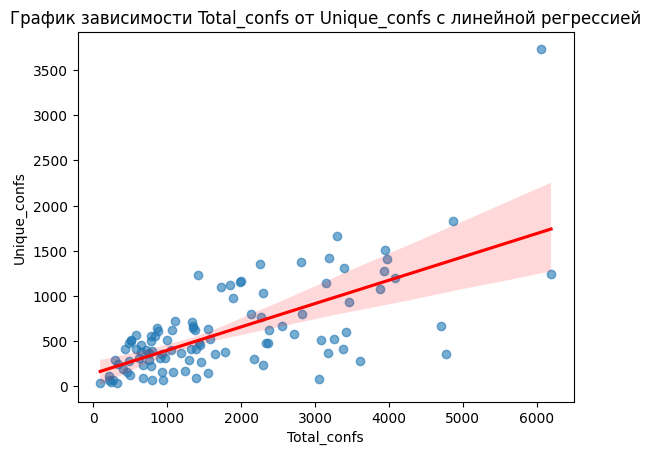

In [ ]:
sns.regplot(x=df['Total_confs'], y=df['Unique_confs'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

plt.title('График зависимости Total_confs от Unique_confs с линейной регрессией')
plt.xlabel('Total_confs')
plt.ylabel('Unique_confs')
plt.show()

Здесь мне стало интересно, увеличивается ли число уникальных конформаций при увеличении числа общих
В целом, такую зависимость мы можем увидеть 

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/strateford/mini

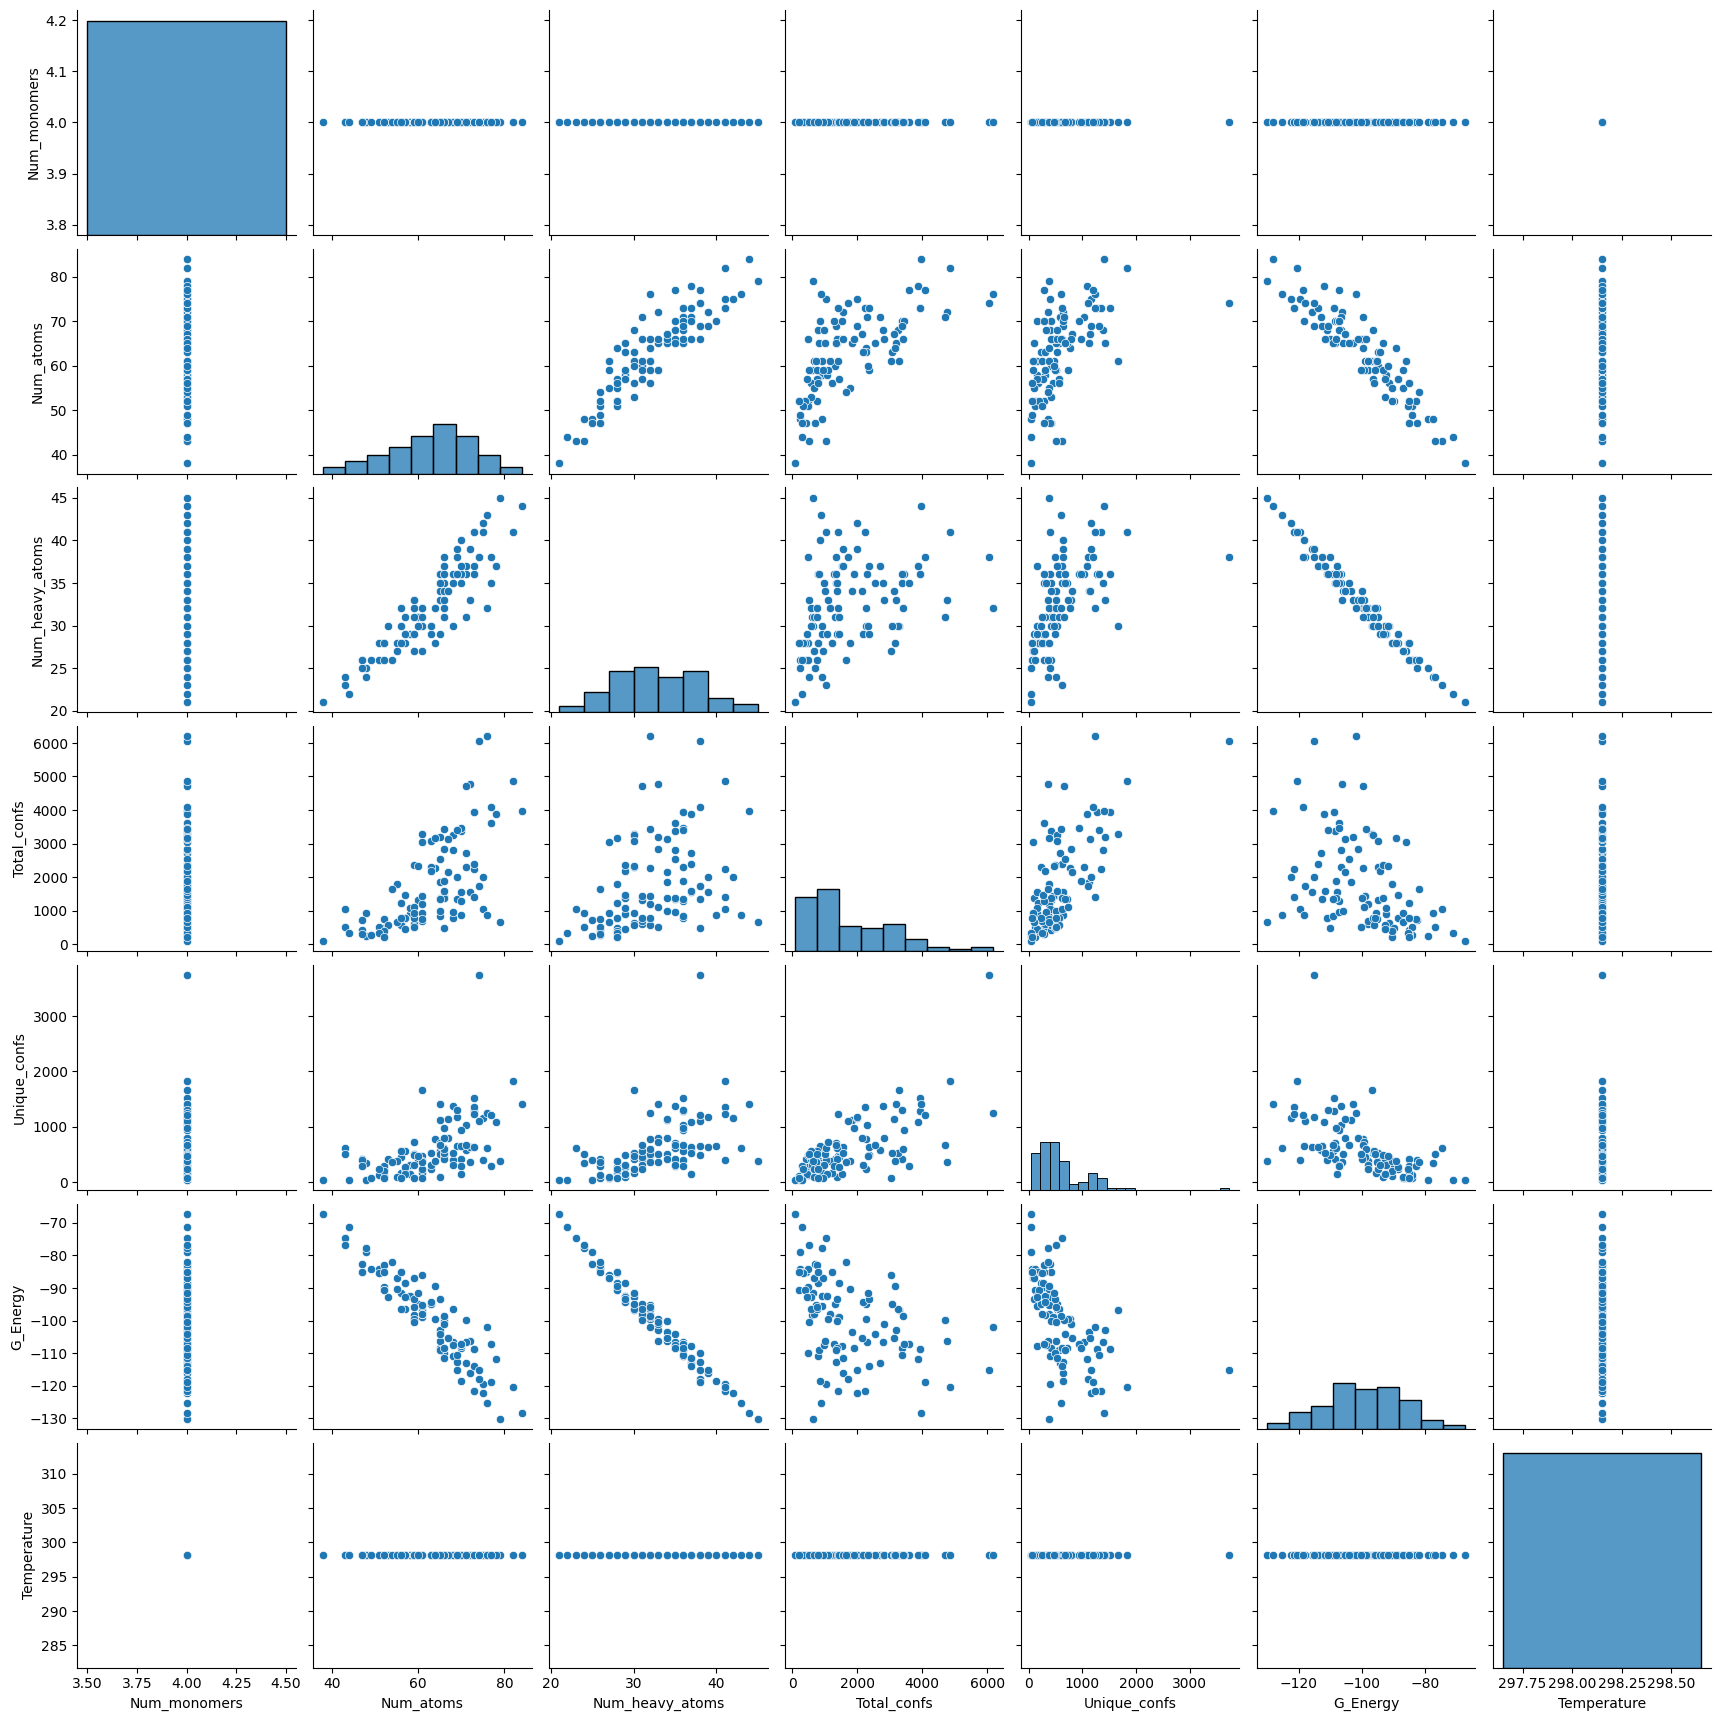

In [ ]:
sns.pairplot(df, palette = colors)
plt.show()

# Раньше мы смотрели распределения только отдельных переменных, теперь же давайте посмотрим их взаимосвязь между собой

В итоге, мы получили точечную диаграмму, через которую мы можем увидеть очень много полезной инфы
Например, смотря на зависимость общего числа конформаций (Total_confs) от энергии Гиббса (G_energy), 
мы можем увидеть пик плотности в области -90 - -100 Кдж/моль. Но данные все равно разбросаны

Другое дело, если мы посмотрим на Unique_confs, там все более точно видно
Наибольшее число молекул с уникальными конформациями имеют энергию Гиббса в диапазоне от -80 до -100 Кдж/моль

In [73]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Num_monomers,Num_atoms,Num_heavy_atoms,Total_confs,Unique_confs,G_Energy,Temperature
0,4,48,25,241,45,-78.96015,298.15
1,4,56,30,643,457,-91.49403,298.15
2,4,60,31,1327,409,-94.85184,298.15
3,4,65,29,1386,91,-93.37815,298.15
4,4,52,28,485,281,-89.71180,298.15


Теперь давайте нормализуем данные, о чем говорили еще раньше
Поскольку у нас есть отрицательные значения в колонке G_Energy, мы будем использовать RobustScaler 
Он хорош, когда мы говорим о данных с разными диапазонами значений, особенно с отрицательными
Также он сохранит отношения между признаками

Для этого выше мы заранее выбрали колонки только с числовыми значениями

In [85]:
from sklearn.preprocessing import RobustScaler
f_numeric = df.select_dtypes(include=['float64', 'int64'])

# Применяем RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Преобразуем numpy-массив обратно в DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

df_scaled

# Результаты, как видим, двояки.  С одной стороны, мы нормализовали данные
# С другой, мы потеряли возможность интерпретации физических значений параметров
# Например, отрицательное число атомов выглядит дико. 
# Но, опять же, для интерпретации физ характеристик данных мы просто можем вернуться к исходным

,Num_monomers,Num_atoms,Num_heavy_atoms,Total_confs,Unique_confs,G_Energy,Temperature
0,0.0,-1.307692,-0.933333,-0.667452,-1.001161,1.104330,0.0
1,0.0,-0.692308,-0.266667,-0.430633,-0.044135,0.415395,0.0
2,0.0,-0.384615,-0.133333,-0.027688,-0.155633,0.230831,0.0
3,0.0,0.000000,-0.400000,0.007069,-0.894309,0.311833,0.0
4,0.0,-1.000000,-0.533333,-0.523711,-0.452962,0.513357,0.0
...,...,...,...,...,...,...,...
98,0.0,0.000000,0.400000,0.691605,0.443670,-0.285043,0.0
99,0.0,-0.076923,-0.533333,1.063918,-0.239257,0.535522,0.0
100,0.0,-0.769231,-0.666667,-0.415317,-0.896632,0.666374,0.0
101,0.0,-0.692308,-0.533333,-0.344624,-0.950058,0.761902,0.0


In [86]:
import plotly.express as px

fig = px.imshow(
    df_scaled.corr(),
    color_continuous_scale=colors,
    text_auto=True  
)
fig.update_layout(
    width=800,  
    height=600  
)

fig.show()

Корреляционные матрицы хороши для изучения степени линейной взаимосвязи между переменными. В статистике корреляция измеряет, насколько две переменные взаимосвязаны друг с другом. Нам эта матрица покажет корреляцию признаков между друг другом

Вывод: 
1) Мы видим значительную корреляцию между числом тяжелых атомов и общим числом атомов в молекуле, что вполне логично
2) Имеется корреляция между числом общих конформаций и уникальных. Это мы обсуждали еще раньше на графиках
3) Из интересного можно отметить корреляцию между количеством атомов и числом общих конформаций в 65%


## Вывод

1) Наш датасет представляет собой данные по числу конформаций (в том числе уникальных), энергии Гиббса для данных молекул 
2) Он также содержит различные дескрипторы, описывающие те или иные характеристики пептидов
3) В датасете не было пропусков или дубликатов, что облегчило работу над ним (ибо мы изначально без них собирали)
4) Некоторые переменные не были близки к нормальному распределению, за счет чего было принято провести нормализацию данных
5) Также можно отметить, что на точечных диаграммах мы заметили интересную зависимость: наибольшее число молекул с уникальными конформациями имеют энергию Гиббса в диапазоне от -80 до -100 Кдж/моль
6) Благодаря корреляционной матрице мы нашли интересную зависимость между между количеством атомов и числом общих конформаций, о которой не думали раньше